In [1]:
import pandas as pd 
import numpy as np

In [2]:
df1 = pd.read_csv("combined_data.csv")
df2 = pd.read_csv("spam.csv")
df3 = pd.read_csv("spam_ham_dataset.csv")
df4 = pd.read_csv("email.csv")

In [3]:
df1 = df1.replace({1:"ham",0:"spam"})
df1 = df1.rename(columns={"text" : "Message","label":"Category"})
df1.head()

,Category,Message
0,ham,ounce feather bowl hummingbird opec moment ala...
1,ham,wulvob get your medircations online qnb ikud v...
2,spam,computer connection from cnn com wednesday es...
3,ham,university degree obtain a prosperous future m...
4,spam,thanks for all your answers guys i know i shou...


In [4]:
df2.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df3 = df3.rename(columns={"text" : "Message","label":"Category"})
df3 = df3.drop(columns = ["Unnamed: 0","label_num"])
df3

,Category,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [6]:
df4 = df4.rename(columns={"text" : "Message","spam":"Category"})
df4 = df4.replace({1:"ham",0:"spam"})
df4.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = pd.concat([df1,df2,df3,df4], ignore_index=True, sort=False)
df.head()

,Category,Message
0,ham,ounce feather bowl hummingbird opec moment ala...
1,ham,wulvob get your medircations online qnb ikud v...
2,spam,computer connection from cnn com wednesday es...
3,ham,university degree obtain a prosperous future m...
4,spam,thanks for all your answers guys i know i shou...


In [8]:
df.shape

(99764, 2)

# Pre-Processing using Lemmetization.

In [9]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()


In [10]:
import re
corpus = []

stop_words = set(stopwords.words('english'))  # Load once, not inside loop

def clean_text(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)  # Fix: 'A-z' also matches special chars
    text = text.lower()
    words = text.split()
    words = [lemmetizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

corpus = df["Message"].apply(clean_text).tolist()

In [11]:
corpus[0]

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

In [12]:
df["Message"][0]

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

## Till now we have converted text to clean text this is preprocessing step to remove waste from text data.


# TF-IDF 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000, binary=True,ngram_range=(1,3))
X = tf.fit_transform(corpus).toarray()

In [14]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X.shape

(99764, 3000)

In [16]:
y = pd.get_dummies(df["Category"])
y = y.iloc[:,1].values

In [17]:
y.shape

(99764,)

## Train-test split.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

## Now since all data conversion and processing is done. Lets check different algorithms to check which is best for this problem with high precision and accuracy.

# Multinomial Naive Bayes Classifier 

In [19]:
from sklearn.naive_bayes import MultinomialNB
spam_class = MultinomialNB().fit(X_train,y_train)


In [20]:
y_pred = spam_class.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve , precision_score, recall_score, f1_score
score = accuracy_score(y_pred,y_test)
score

0.875006264722097

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.93      0.86      0.90     12451
        True       0.80      0.90      0.84      7502

    accuracy                           0.88     19953
   macro avg       0.86      0.88      0.87     19953
weighted avg       0.88      0.88      0.88     19953



In [23]:
Metrics = pd.DataFrame(columns=["ML-Model","Precision","Recall","F1-Score","Accuracy"])

In [24]:
Metrics.loc[len(Metrics)] = ["Multinomial-NB", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]
print (f" Precision : {precision_score(y_test, y_pred)}")
print(f" Recall : {recall_score(y_test, y_pred)}")
print(f" F1-Score:  {f1_score(y_test, y_pred)} ")


 Precision : 0.8966942148760331
 Recall : 0.7964717025811034
 F1-Score:  0.8436167544519689 


# Stochastic gradient Descent


In [25]:
from sklearn.linear_model import SGDClassifier
spam_class = SGDClassifier().fit(X_train,y_train)

y_pred = spam_class.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94     11507
        True       0.94      0.89      0.91      8446

    accuracy                           0.93     19953
   macro avg       0.93      0.92      0.93     19953
weighted avg       0.93      0.93      0.93     19953



In [27]:
Metrics.loc[len(Metrics)] = ["SGDClassifier", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]

In [28]:
Metrics

,ML-Model,Precision,Recall,F1-Score,Accuracy
0,Multinomial-NB,0.896694,0.796472,0.843617,0.875006
1,SGDClassifier,0.941095,0.889060,0.914338,0.929484


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
spam_class = RandomForestClassifier().fit(X_train,y_train)
y_pred = spam_class.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.95     11507
        True       0.94      0.92      0.93      8446

    accuracy                           0.94     19953
   macro avg       0.94      0.94      0.94     19953
weighted avg       0.94      0.94      0.94     19953



In [31]:
Metrics.loc[len(Metrics)] = ["Random Forest Classifier", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]
Metrics

,ML-Model,Precision,Recall,F1-Score,Accuracy
0,Multinomial-NB,0.896694,0.796472,0.843617,0.875006
1,SGDClassifier,0.941095,0.889060,0.914338,0.929484
2,Random Forest Classifier,0.941269,0.924106,0.932608,0.943467


# Linear Regression



In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [33]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93     11507
        True       0.94      0.88      0.91      8446

    accuracy                           0.92     19953
   macro avg       0.93      0.92      0.92     19953
weighted avg       0.92      0.92      0.92     19953



In [34]:
y_pred = y_pred_labels

In [35]:
Metrics.loc[len(Metrics)] = ["Linear Regression", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]

In [36]:
Metrics

,ML-Model,Precision,Recall,F1-Score,Accuracy
0,Multinomial-NB,0.896694,0.796472,0.843617,0.875006
1,SGDClassifier,0.941095,0.889060,0.914338,0.929484
2,Random Forest Classifier,0.941269,0.924106,0.932608,0.943467
3,Linear Regression,0.936568,0.877575,0.906112,0.923019


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

spam_classifier = LogisticRegression().fit(X_train, y_train)
y_pred = spam_classifier.predict(X_test)


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94     11507
        True       0.93      0.89      0.91      8446

    accuracy                           0.93     19953
   macro avg       0.93      0.92      0.92     19953
weighted avg       0.93      0.93      0.92     19953



In [39]:
Metrics.loc[len(Metrics)] = ["Logistic Regression", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]

In [40]:
Metrics

,ML-Model,Precision,Recall,F1-Score,Accuracy
0,Multinomial-NB,0.896694,0.796472,0.843617,0.875006
1,SGDClassifier,0.941095,0.889060,0.914338,0.929484
2,Random Forest Classifier,0.941269,0.924106,0.932608,0.943467
3,Linear Regression,0.936568,0.877575,0.906112,0.923019
4,Logistic Regression,0.932132,0.887876,0.909466,0.925174


# Ada Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier().fit(X_train, y_train)
y_pred = ada_classifier.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.95      0.91     11507
        True       0.92      0.82      0.87      8446

    accuracy                           0.89     19953
   macro avg       0.90      0.88      0.89     19953
weighted avg       0.89      0.89      0.89     19953



In [43]:
Metrics.loc[len(Metrics)] = ["Ada boost", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]

In [44]:
Metrics

,ML-Model,Precision,Recall,F1-Score,Accuracy
0,Multinomial-NB,0.896694,0.796472,0.843617,0.875006
1,SGDClassifier,0.941095,0.889060,0.914338,0.929484
2,Random Forest Classifier,0.941269,0.924106,0.932608,0.943467
3,Linear Regression,0.936568,0.877575,0.906112,0.923019
4,Logistic Regression,0.932132,0.887876,0.909466,0.925174
5,Ada boost,0.916700,0.820862,0.866138,0.892598


# XG Boost

In [45]:
!pip install xgboost

In [46]:
import xgboost as xgb
xgbr = xgb.XGBRegressor().fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [47]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

       False       0.94      0.97      0.95     11507
        True       0.95      0.91      0.93      8446

    accuracy                           0.94     19953
   macro avg       0.95      0.94      0.94     19953
weighted avg       0.94      0.94      0.94     19953



In [49]:
y_pred = y_pred_labels

In [50]:
Metrics.loc[len(Metrics)] = ["XG Boost", precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)]

# So totally now we have all performances here..

In [51]:
Metrics 

,ML-Model,Precision,Recall,F1-Score,Accuracy
0,Multinomial-NB,0.896694,0.796472,0.843617,0.875006
1,SGDClassifier,0.941095,0.889060,0.914338,0.929484
2,Random Forest Classifier,0.941269,0.924106,0.932608,0.943467
3,Linear Regression,0.936568,0.877575,0.906112,0.923019
4,Logistic Regression,0.932132,0.887876,0.909466,0.925174
5,Ada boost,0.916700,0.820862,0.866138,0.892598
6,XG Boost,0.953802,0.911793,0.932324,0.943968


<Axes: xlabel='ML-Model', ylabel='Accuracy'>

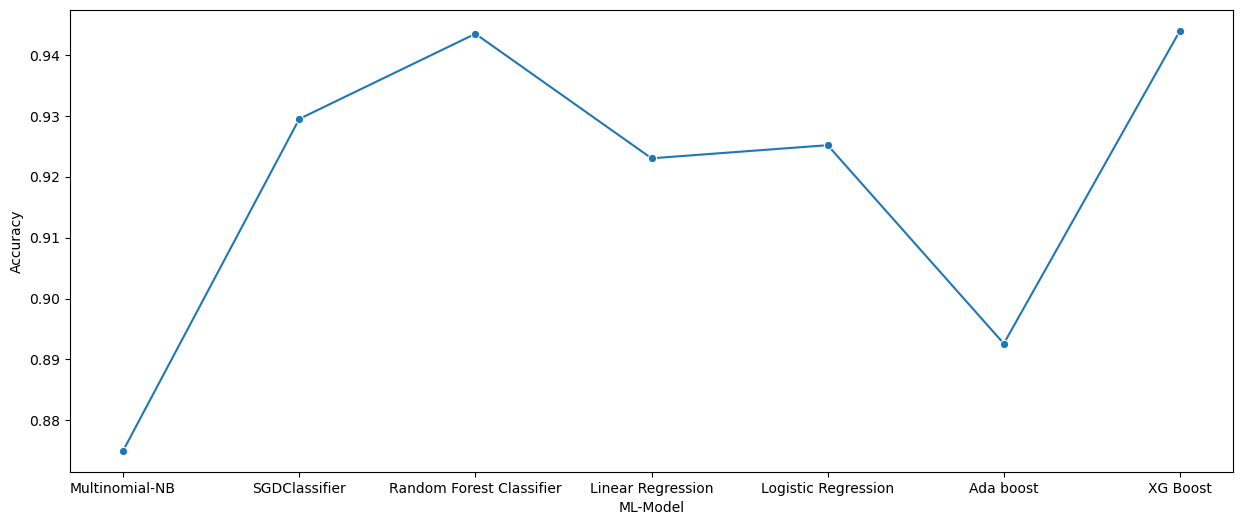

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.lineplot(data=Metrics, x="ML-Model", y="Accuracy", marker="o")

<Axes: xlabel='ML-Model', ylabel='Precision'>

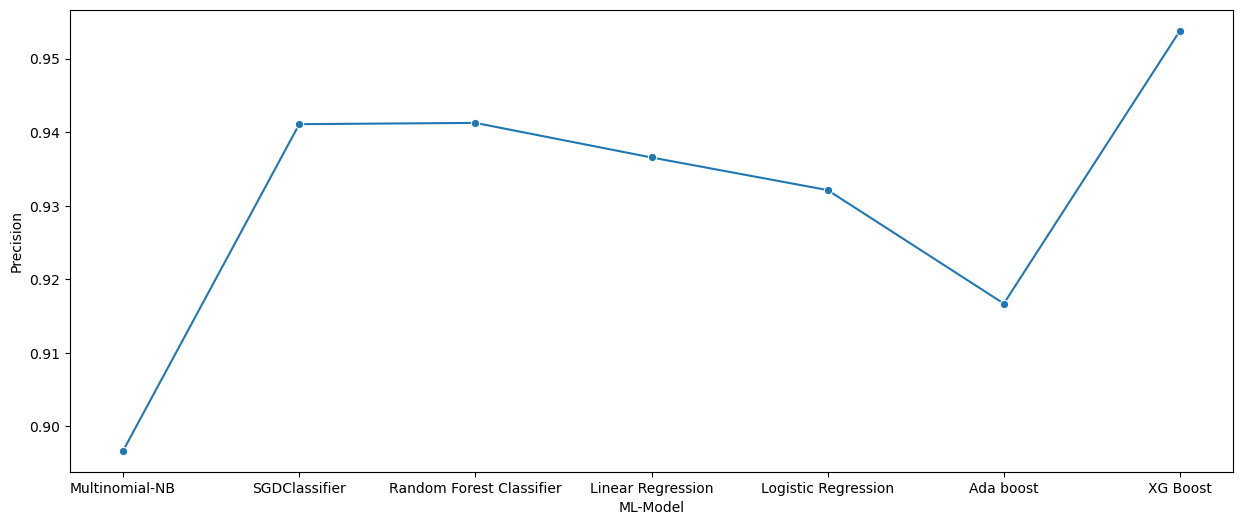

In [63]:
plt.figure(figsize=(15,6))
sns.lineplot(data=Metrics, x="ML-Model", y="Precision", marker="o")

<Axes: xlabel='ML-Model', ylabel='Recall'>

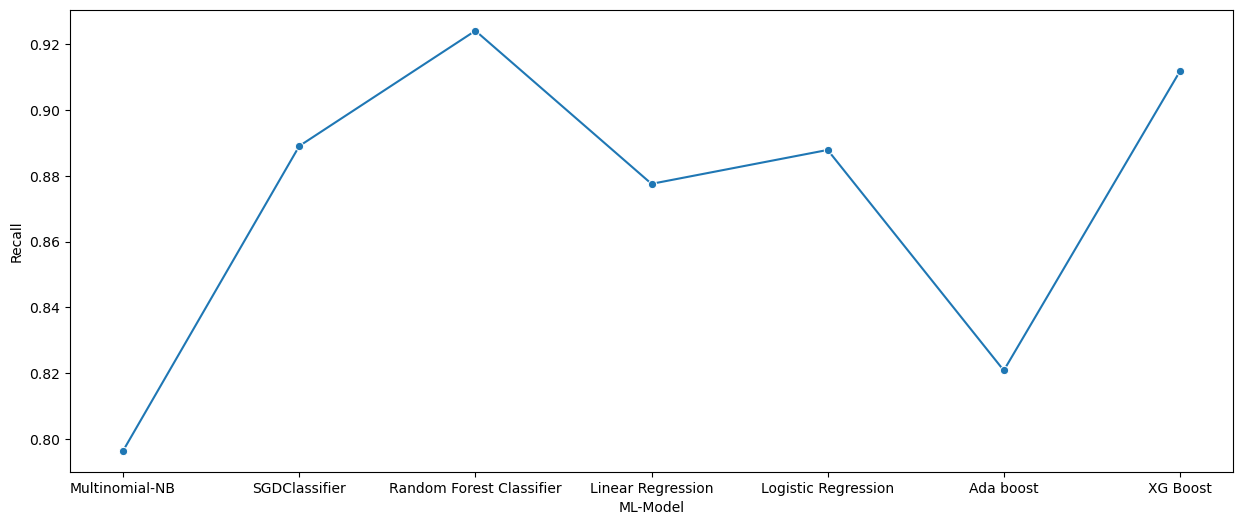

In [64]:
plt.figure(figsize=(15,6))
sns.lineplot(data=Metrics, x="ML-Model", y="Recall", marker="o")